In [1]:
# The data used in this project is from Kaggle and can be found in the following link: https://www.kaggle.com/mchirico/montcoalert
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
%matplotlib inline 

In [2]:
# EN: Import the 911 calls data 
# PT: Importe os dados das ligações para o 911
df = pd.read_csv('911.csv')

In [3]:
# EN: Print the head of the dataframe 
# PT: imprima o cabeçalho dos dados
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# EN: Check the dataframe information 
# PT: Cheque as informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# EN: How many unique zip codes are there in the dataframe?
# PT: Quantos CEPs únicos existem no dataframe?
df['zip'].nunique()

104

In [6]:
# EN: Count the 10 most frequent zip codes including Null values
# PT: Quais são os CEPs que mais aparecem incluindo os valores nulos
df['zip'].value_counts(dropna = False).head(10)

NaN        12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
19406.0     3174
19002.0     3050
19468.0     2990
19454.0     2781
19090.0     2635
Name: zip, dtype: int64

In [7]:
# EN: What are the top 10 townships in number of 911 call
# PT: Quais são as 10 localidades com mais chamadas
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [12]:
# EN: How many unique titles there are
# PT: Quantos títulos únicos de ocorrências existem
df['title'].nunique()

110

In [9]:
# EN: 10 most common occurrences
# PT: Quais são os 10 títulos de ocorrências que mais aparecem
df['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [10]:
# EN: It seems that all occurrences have the a classification first, let's use that to create a new column called 'category'
# PT: Parece que todas as ocorrências possuem uma identificação no início, crie uma nova coluna com essa informação
df['category'] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
# EN: Count the number of occurrences for each category
# PT: Conte o número de ocorrências para cada categoria 
df['category'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

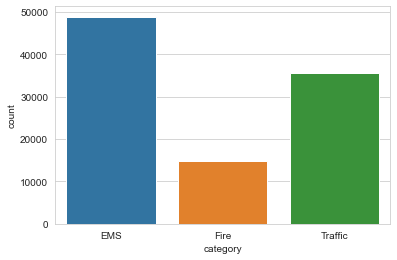

In [13]:
# EN: Using seaborn create a count plot of the categories
# PT: Utilizando o seaborn crie um gráfico com a contagem de ocorrências para cada categoria
sns.countplot(data=df, x= 'category')

In [14]:
# EN: Now let's analyse the date. First check the type of data stored in the 'timeStemp' column
# PT: Agora vamos analisar a data/hora. Primeiramente verifique qual a forma que os dados da coluna 'timeStemp' são armazenados  

print(df['timeStamp'].iloc[5])
type(df['timeStamp'].iloc[5])

2015-12-10 17:40:01


str

In [15]:
# EN: As we can see, the date and time are kept as strings. Convert the column to be stored as date and time values
# PT: Como podemos ver a data e hora são armazenadas como variáveis de texto. Vamos converter os dados para o formato de data
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [16]:
# EN: Check if it really worked 
# PT: Verifique se funcionou
type(df['timeStamp'].iloc[5])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# EN: To make this information more useful let's create tree new columns from timeStamp: 'hour', 'month' and 'dayOfWeek'
# PT: Para aproveitar melhor essa informação vamos criar três novas colunas a partir da coluna 'timeStamp': hora, mês e dia da semana

df['hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
df['month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)
df['dayofweek'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

In [18]:
# EN: Let's check the number of calls for each month
# PT: Vamos verificar o número de ligações em cada mês 
df['month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: month, dtype: int64

In [19]:
# Interesting to note that there are no occurrences in september, october and november
# Interessante notar que os meses de setembro, outubro e novembro não aparecem

In [20]:
# EN: Let's do the same for the 'dayoftheweek' column
# PT: Vamos fazer o mesmo para a coluna dos dias da semana
df['dayofweek'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: dayofweek, dtype: int64

In [21]:
# EN: And let's confirm all the days in the week have calls  
# PT: Vamos confirmar se todos os dias da semana possuem ligações 
df['dayofweek'].nunique()

7

In [22]:
# EN: The 'month' values are integers from 1 to 12 while the 'dayofweek' are integers from 0 to 6
#assign to the integer of each day to it's string from monday to sunday

# PT: Os valores referentes ao mês são números inteiros de 1 a 12 enquanto que os dias da semana são inteiros de 0 a 6
#atribua ao valor inteiro do dia da semana seu respectivo texto de segunda até domingo

day_string = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(day_string)

In [23]:
# EN: And check if it worked
# PT: Verifique se funcionou

df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

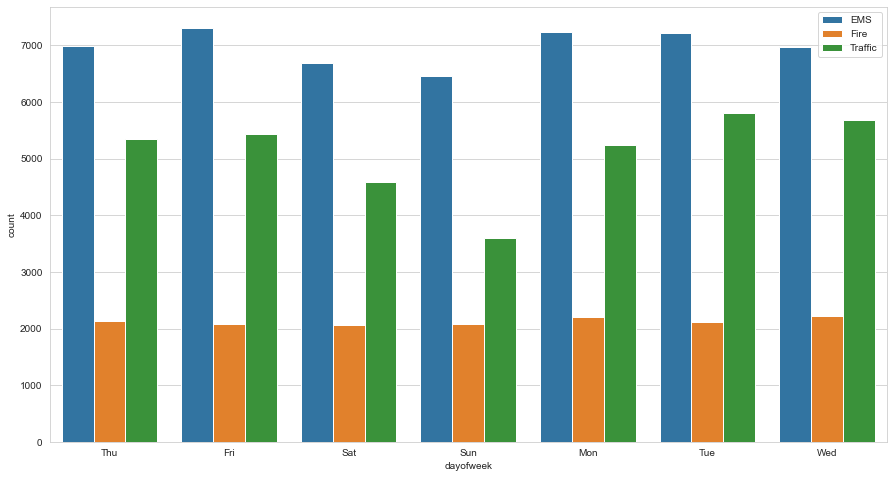

In [24]:
# EN: With Seaborn create a countplot of the number of calls in each day of the week and separate it by category
# PT: Usando Seaborn crie um gráfico do número de ligações em cada dia da semana e separe por categorias

plt.figure(figsize=(15,8))
sns.countplot(data=df, x='dayofweek', hue='category')
plt.legend(loc='upper right')

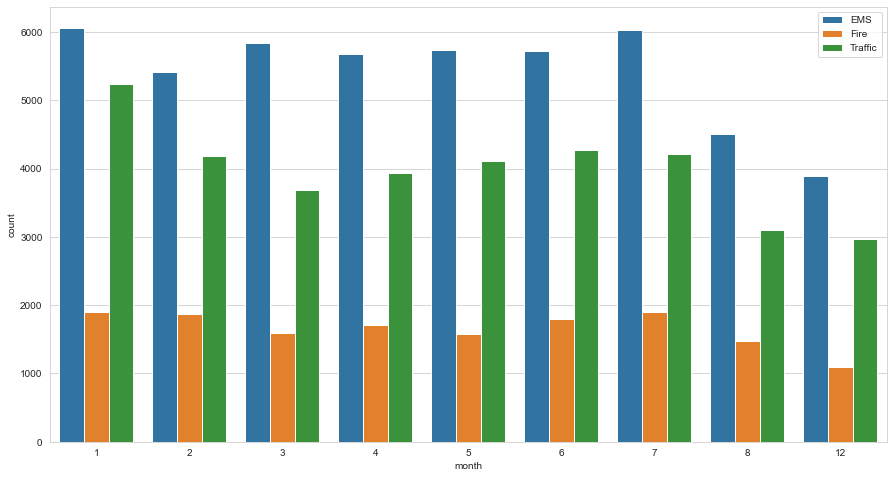

In [25]:
# EN: With Seaborn create a countplot of the number of calls in each month and separate it by category
# PT: Usando Seaborn crie um gráfico do número de ligações em mês e separe por categorias

plt.figure(figsize=(15,8))
sns.countplot(data=df, x='month', hue='category')
plt.legend(loc='upper right')